# Titanic Survival

### Introduction
A junior data scientist has built a model that predicts whether a passenger survives the sinking of the titanic based on the cost of their fare.

The software development team love the proof of concept and want to start using the model in new features, your job as a more senior data scientist is to review the model and methodology and make any improvements you can.

### Instructions
 1. Critically evaluate the methodology and the model
 2. Suggest improvements to the methodology and the model
 3. Collaborate to make any improvements you can in the given time
 4. Suggest longer term, ambitious improvements

The data is from [Titanic Kaggle competition](https://www.kaggle.com/c/titanic/overview)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv("data/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
SURVIVED_COL = "Survived"
FARE_COL = "Fare"

In [4]:
train[FARE_COL].fillna(method="bfill", inplace=True)

In [5]:
grouped = train[[SURVIVED_COL, FARE_COL]].groupby(SURVIVED_COL).mean()
grouped

,Fare
Survived,
0,22.117887
1,48.395408


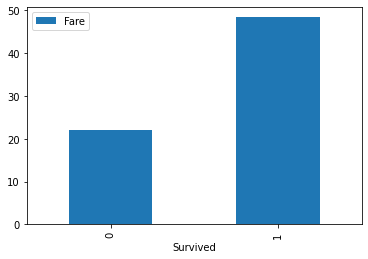

In [6]:
_ = grouped.plot(kind="bar")

In [7]:
train_x = train[[FARE_COL]]
val_x = train[[FARE_COL]].tail(100)

train_y = train[SURVIVED_COL]
val_y = train[SURVIVED_COL].tail(100)

model = LogisticRegression()
model.fit(train_x, train_y)

preds = model.predict(val_x)

accuracy_score(val_y, preds)

0.68